In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
from sklearn.model_selection import train_test_split


In [4]:
from sklearn.naive_bayes import GaussianNB


In [5]:
from sklearn.tree import DecisionTreeClassifier


In [6]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [7]:
import seaborn as sns


In [8]:
import matplotlib.pyplot as plt


In [9]:
np.random.seed(42)

In [10]:
file_path = "US_Heart_Patients.csv" 

In [11]:
data = pd.read_csv(file_path)

In [12]:
print("First 10 rows of the data:")
print(data.head(10))


First 10 rows of the data:
   Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   
5  Female  43.0        2.0            0.0         0.0      0.0   
6  Female  63.0        1.0            0.0         0.0      0.0   
7  Female  45.0        2.0            1.0        20.0      0.0   
8    Male  52.0        1.0            0.0         0.0      0.0   
9    Male  43.0        1.0            1.0        30.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0

In [13]:
# 5-point summary
print("\n5-point summary:")
print(data.describe())


5-point summary:
               age    education  currentSmoker   cigsPerDay      BP Meds  \
count  4238.000000  4130.000000    4237.000000  4209.000000  4180.000000   
mean     49.579283     1.979903       0.494218     9.001901     0.029665   
std       8.572875     1.019943       0.500026    11.920742     0.169682   
min      32.000000     1.000000       0.000000     0.000000     0.000000   
25%      42.000000     1.000000       0.000000     0.000000     0.000000   
50%      49.000000     2.000000       0.000000     0.000000     0.000000   
75%      56.000000     3.000000       1.000000    20.000000     0.000000   
max      70.000000     4.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes  tot cholesterol  \
count      4231.000000   4238.000000  4238.000000      4180.000000   
mean          0.005909      0.310524     0.025720       236.677273   
std           0.076650      0.462763     0.158316        44.616098   
min           0.0

In [14]:
# Information about the column data types
print("\nInformation about the column data types:")
print(data.info())


Information about the column data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), in


Number of outliers:


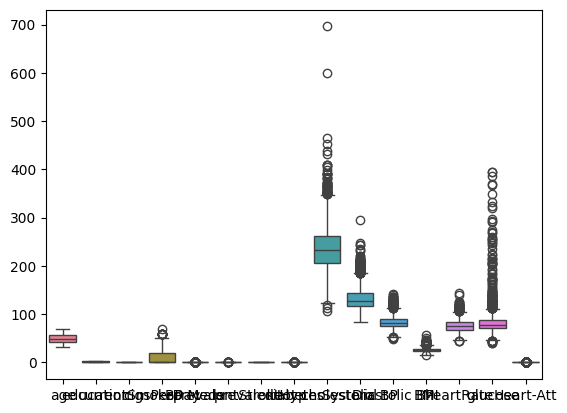

In [15]:
# Number of outliers
# You can use box plots or any other method to detect outliers
# Here, we use a simple box plot for illustration
print("\nNumber of outliers:")
sns.boxplot(data=data)
plt.show()

In [16]:
# Any missing value
print("\nAny missing value:")
print(data.isnull().sum())


Any missing value:
Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64


In [17]:
# # Correlation between variables
# print("\nCorrelation between variables:")
# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
# plt.show()

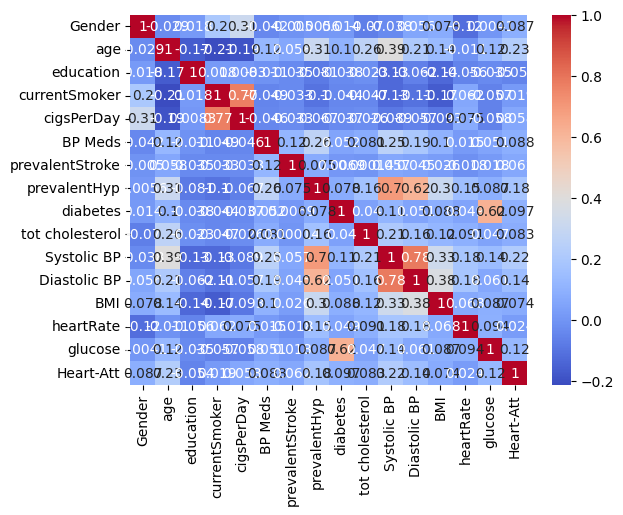

In [18]:
# Convert categorical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded = data.apply(lambda x: le.fit_transform(x) if x.dtype == 'O' else x)

# Correlation between variables
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


Distribution of the data:


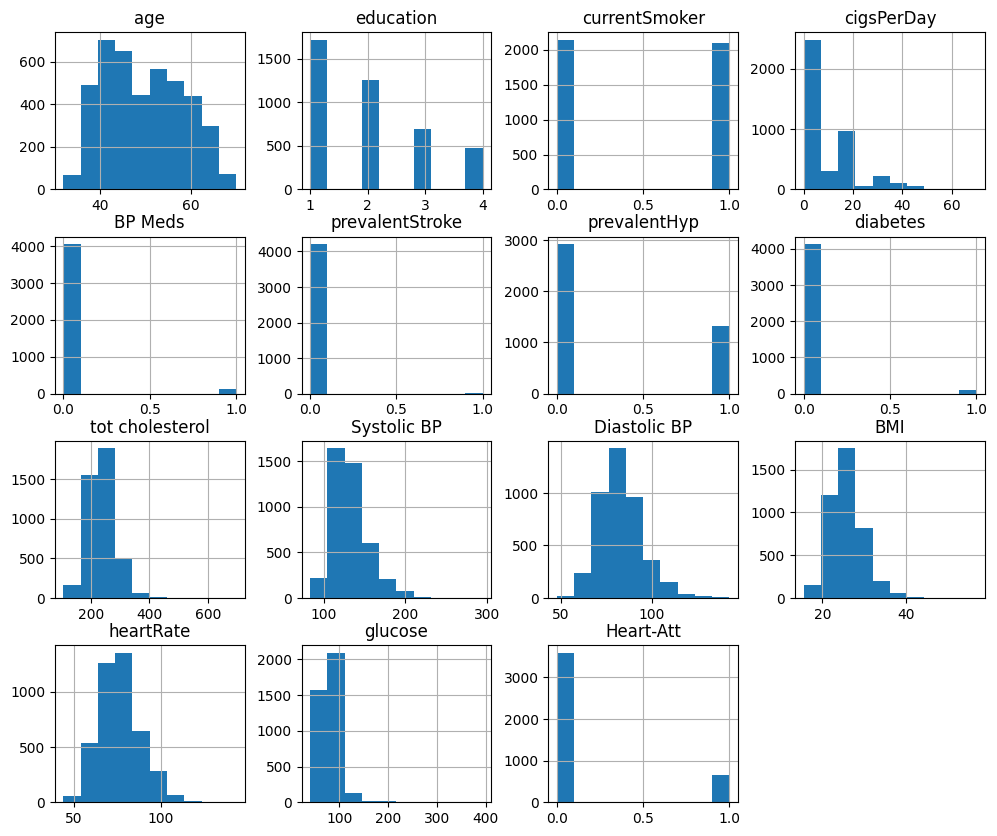

In [19]:
# Distribution of the data
print("\nDistribution of the data:")
data.hist(figsize=(12, 10))
plt.show()

In [20]:
# # 3. Data Preprocessing
# # Impute missing values
# # For simplicity, let's fill missing values with the mean of the respective column
# data.fillna(data.mean(), inplace=True)

In [21]:
# 3. Data Preprocessing

numeric_columns = data.select_dtypes(include=['number']).columns

# Impute missing values only for numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify if there are any remaining missing values
print("Remaining missing values:")
print(data.isnull().sum())

Remaining missing values:
Gender             8
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64


In [22]:
# 4. Split the dataset
X = data.drop('Heart-Att', axis=1)  # replace 'target_column' with your actual target column
y = data['Heart-Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Display the column names
data.columns


Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [24]:
# # 5. Model preparation and evaluation
# # Naive Bayes
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)
# nb_train_predictions = nb_model.predict(X_train)
# nb_test_predictions = nb_model.predict(X_test)
# nb_f1_score = f1_score(y_test, nb_test_predictions)

In [25]:
# 4. Split the dataset
X = data.drop('Heart-Att', axis=1)  # Replace 'target_column' with your actual target column
y = data['Heart-Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# 5. Model preparation and evaluation
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_encoded, y_train)
nb_train_predictions = nb_model.predict(X_train_encoded)
nb_test_predictions = nb_model.predict(X_test_encoded)
nb_f1_score = f1_score(y_test, nb_test_predictions)

# Print F1 score
print("Naive Bayes F1 Score:", nb_f1_score)

Naive Bayes F1 Score: 0.22099447513812157


In [26]:
# # Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)
# dt_train_predictions = dt_model.predict(X_train)
# dt_test_predictions = dt_model.predict(X_test)
# dt_f1_score = f1_score(y_test, dt_test_predictions)

In [27]:
# 4. Split the dataset
X = data.drop('Heart-Att', axis=1)  # Replace 'target_column' with your actual target column
y = data['Heart-Att']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# 5. Model preparation and evaluation
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_encoded, y_train)
dt_train_predictions = dt_model.predict(X_train_encoded)
dt_test_predictions = dt_model.predict(X_test_encoded)
dt_f1_score = f1_score(y_test, dt_test_predictions)

# Print F1 score
print("Decision Tree F1 Score:", dt_f1_score)

Decision Tree F1 Score: 0.2417582417582418


In [28]:
# Compare F1 scores
print("\nF1 Score Comparison:")
print("Naive Bayes F1 Score:", nb_f1_score)
print("Decision Tree F1 Score:", dt_f1_score)


F1 Score Comparison:
Naive Bayes F1 Score: 0.22099447513812157
Decision Tree F1 Score: 0.2417582417582418


In [29]:
# Pick the best model
best_model = nb_model if nb_f1_score > dt_f1_score else dt_model
best_model_name = "Naive Bayes" if nb_f1_score > dt_f1_score else "Decision Tree"

In [30]:
# # Confusion Matrix and Classification Report for the best model
# best_model_predictions = best_model.predict(X_test)
# conf_matrix = confusion_matrix(y_test, best_model_predictions)
# class_report = classification_report(y_test, best_model_predictions)

In [31]:
# # Assuming 'Gender' is a categorical variable

# # 1. One-hot encode the 'Gender' variable in the test set
# X_test_encoded = pd.get_dummies(X_test, columns=['Gender'])

# # 2. Ensure that all columns present in X_train are also present in X_test_encoded
# missing_columns = set(X_train.columns) - set(X_test_encoded.columns)
# for column in missing_columns:
#     X_test_encoded[column] = 0  # Add missing columns and set values to 0

# # 3. Reorder the columns to match the order during training
# X_test_encoded = X_test_encoded[X_train.columns]

# # Now, you can use X_test_encoded for predictions
# best_model_predictions = best_model.predict(X_test_encoded)


In [32]:
# Assuming 'Gender' is a categorical variable

# 1. One-hot encode the 'Gender' variable in both training and test sets
X_train_encoded = pd.get_dummies(X_train, columns=['Gender'])
X_test_encoded = pd.get_dummies(X_test, columns=['Gender'])

# 2. Add missing columns to the test set and set values to 0
missing_columns = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for column in missing_columns:
    X_test_encoded[column] = 0

# 3. Reorder the columns to match the order during training
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Now, you can use X_test_encoded for predictions
best_model_predictions = best_model.predict(X_test_encoded)


In [33]:

conf_matrix = confusion_matrix(y_test, best_model_predictions)
class_report = classification_report(y_test, best_model_predictions)

In [34]:
print("\nConfusion Matrix for", best_model_name, ":")
print(conf_matrix)




Confusion Matrix for Decision Tree :
[[608 117]
 [ 90  33]]


In [35]:
print("\nClassification Report for", best_model_name, ":")
print(class_report)


Classification Report for Decision Tree :
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       725
           1       0.22      0.27      0.24       123

    accuracy                           0.76       848
   macro avg       0.55      0.55      0.55       848
weighted avg       0.78      0.76      0.77       848



# FINAL RESULT